<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Loading-Some-Data" data-toc-modified-id="Loading-Some-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Some Data</a></span></li><li><span><a href="#Components-of-Time-Series-Data" data-toc-modified-id="Components-of-Time-Series-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Components of Time Series Data</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Seasonality</a></span></li><li><span><a href="#Cyclical" data-toc-modified-id="Cyclical-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cyclical</a></span></li><li><span><a href="#Irregular" data-toc-modified-id="Irregular-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Irregular</a></span></li></ul></li><li><span><a href="#Stationary-and-Trends" data-toc-modified-id="Stationary-and-Trends-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stationary and Trends</a></span><ul class="toc-item"><li><span><a href="#Criteria-for-a-Stationary-Time-Series" data-toc-modified-id="Criteria-for-a-Stationary-Time-Series-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Criteria for a Stationary Time Series</a></span></li><li><span><a href="#Types-of-Trends" data-toc-modified-id="Types-of-Trends-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Types of Trends</a></span><ul class="toc-item"><li><span><a href="#No-Trend" data-toc-modified-id="No-Trend-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>No Trend</a></span></li><li><span><a href="#Linear-Trend" data-toc-modified-id="Linear-Trend-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Linear Trend</a></span></li><li><span><a href="#Exponential" data-toc-modified-id="Exponential-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Exponential</a></span></li><li><span><a href="#Periodic" data-toc-modified-id="Periodic-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Periodic</a></span></li></ul></li><li><span><a href="#Example-Data:-Is-It-Stationary?" data-toc-modified-id="Example-Data:-Is-It-Stationary?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Example Data: Is It Stationary?</a></span><ul class="toc-item"><li><span><a href="#Dickey-Fuller-Test" data-toc-modified-id="Dickey-Fuller-Test-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Dickey-Fuller Test</a></span></li></ul></li></ul></li><li><span><a href="#Getting-a-Stationary-Time-Series" data-toc-modified-id="Getting-a-Stationary-Time-Series-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Getting a Stationary Time Series</a></span><ul class="toc-item"><li><span><a href="#Rolling-Statistics" data-toc-modified-id="Rolling-Statistics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Rolling Statistics</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

# Objectives

- Identify different trends of a time series data
- Use rolling and weighted averages to inspect time series

# Loading Some Data

Let's put in some data to make working with some later examples easier:

In [2]:
# New York Stock Exchange average monthly returns [1961-1966] from curriculum
nyse = pd.read_csv('data/NYSE_monthly.csv')
col_name= 'Month'
nyse[col_name] = pd.to_datetime(nyse[col_name])
nyse.set_index(col_name, inplace=True)

In [3]:
# Example generated data 
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])

ts = pd.Series(sales+bigger+6, index=index)

# Components of Time Series Data

A time series in general is supposed to be affected by four main components, which can be separated from the observed data. These components are: *Trend, Cyclical, Seasonal and Irregular* components.

## Trend 

> The long term movement of a time series. 

For example, series relating to population growth, number of houses in a city etc. show upward trend.

## Seasonality

> Fluctuation in the data set that follow a regular pattern due to outside influences

For example sales of ice-cream increase in summer, or daily web traffic.

## Cyclical

> When data exhibit rises and falls that are not of fixed period

Think of business cycles which usually last several years, but where the length of the current cycle is unknown beforehand.

> **NOTE:** Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of fixed period then they are cyclic; if the period is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.

## Irregular

> Caused by unpredictable influences, which are not regular and also do not repeat in a particular pattern. 

These variations are caused by incidences that come at random intervals. There is no defined statistical technique for measuring random fluctuations in a time series.

# Stationary and Trends

When building our models, we will want to account for these patterns somehow.  Time series whose mean and variance have trends across time will be difficult to predict out into the future. 

> A **stationary time series** is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. 

Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!

It may seem counterintuitive that, for modeling purposes, we want our time series not to be a function of time! But the basic idea is the familiar one that we want our datapoints to be mutually *independent*. For more on this topic, see [here](https://stats.stackexchange.com/questions/19715/why-does-a-time-series-have-to-be-stationary).

## Criteria for a Stationary Time Series

- The series' **mean** is **not** a function of time
![https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png](images/Mean_nonstationary.png)

- The series' **varaince** is **not** a function of time (heteroscedacity)
![https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png](images/Var_nonstationary.png)

- The series' **covaraince** is **not** a function of time
![https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png](images/Cov_nonstationary.png)

> Images from [https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)

## Types of Trends

### No Trend

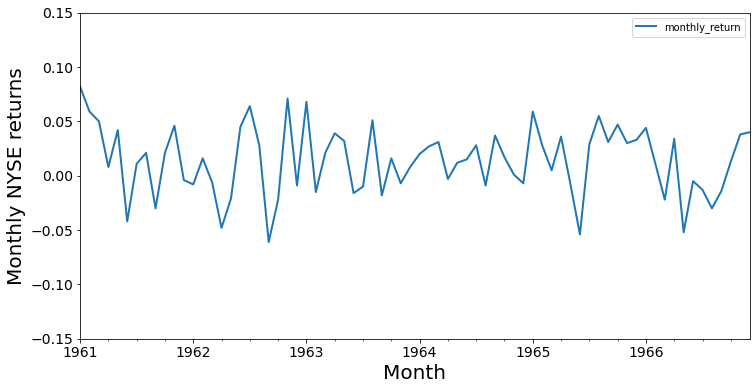

In [4]:
data = nyse
data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel(col_name, fontsize=20)
plt.ylabel("Monthly NYSE returns", fontsize=20)
plt.ylim((-0.15,0.15));

### Linear Trend

Upward or downward

![](images/linear_trend-upward.png)

![](images/linear_trend-downward.png)

### Exponential

![](images/exponential_trend.png)

### Periodic

![](images/periodic_trend-temperature.png)

![](images/periodic_trend-miles.png)

## Example Data: Is It Stationary?

Let's see if this example time series data is stationary.

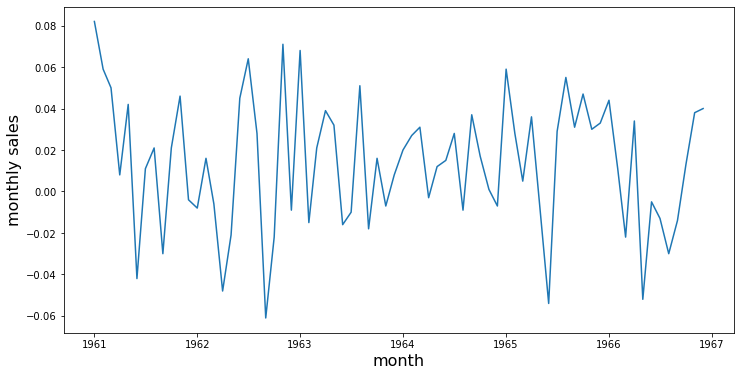

In [5]:
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel("month", fontsize=16)
plt.ylabel("monthly sales", fontsize=16)
plt.show()

> Can you tell if it is just by looking?

### Dickey-Fuller Test

One way of testing for stationarity is to use the Dickey-Fuller Test. The statsmodels version returns the test statistic and a p-value, relative to the null hypothesis that the series in question is NOT stationary. For more, see [this Wikipedia page](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test).

Statistical test for testing stationarity; $H_0$ is that time series is **not** stationary. Checkout `statmodels` [documentation for this test](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

In [6]:
dftest = adfuller(data)
display(dftest)

(-7.895374756572357,
 4.3251262842625694e-12,
 0,
 71,
 {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957},
 -240.18590988937115)

In [7]:
# Extract and display test results in a user friendly manner
dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
)

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
display(dfoutput)

Test Statistic                -7.895375e+00
p-value                        4.325126e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64

# Getting a Stationary Time Series 

Let's try out seeing how we can get a time series that is (clearly) non-stationary to something we can make predictions on.

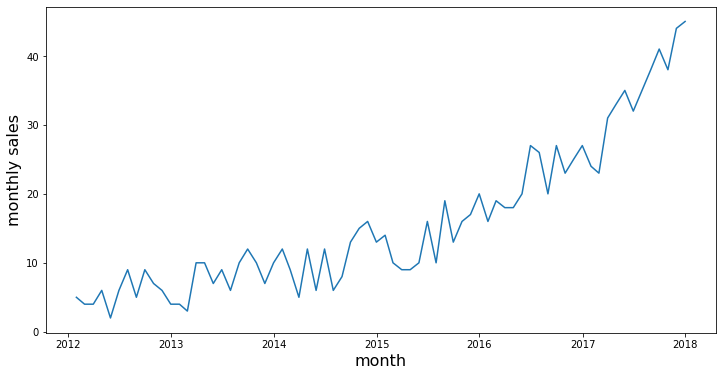

In [8]:
# Let's see how it looks
fig = plt.figure(figsize=(12,6))
plt.plot(ts)
plt.xlabel("month", fontsize=16)
plt.ylabel("monthly sales", fontsize=16)
plt.show()

## Rolling Statistics

Take the average of a number of past data points (over a time period)

### Example

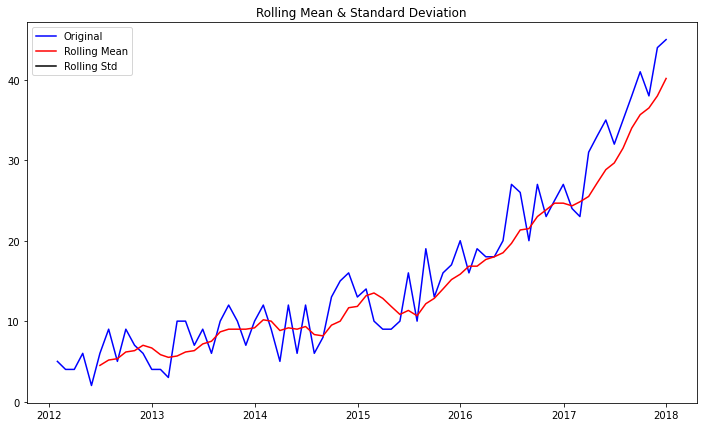

In [9]:
rolmean = ts.rolling(window = 6, center = False).mean()
rolstd = ts.rolling(window = 1, center = False).std()

fig = plt.figure(figsize=(12,7))
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)